In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_table("~/Documents/Erika Diabetes/sep13/saludosdesdepachuca/Serie_intermedia.txt", header=None)
intermedia = np.array(df[0])
intermedia

array([-0.016,  0.   ,  0.   , ..., -0.026, -0.021, -0.026])

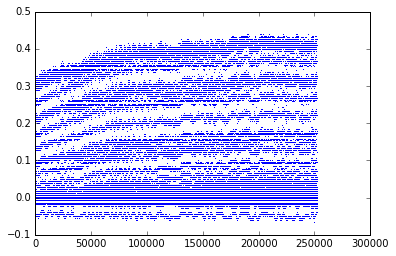

In [4]:
plt.plot(intermedia, ',')

In [20]:
from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

x=np.arange(0, 7, .001)
calc_MI(np.sin(x[:-100]), np.sin(x[100:]), 100)

3.3680095573491111

<IPython.core.display.Javascript object>


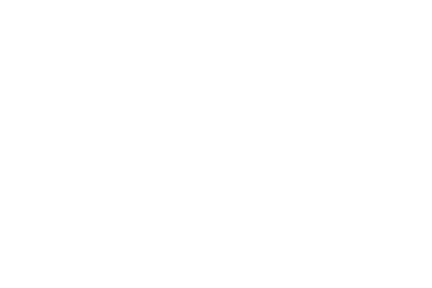

<IPython.core.display.Javascript object>


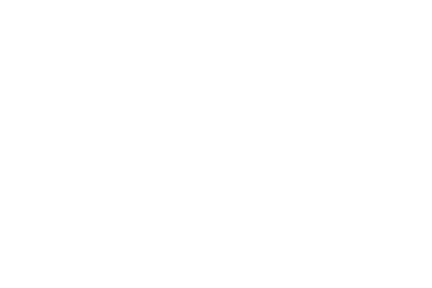

In [21]:
yy=list(calc_MI(range(len(intermedia)), intermedia, i) for i in range(1,1000))
plt.plot(yy)
plt.show()

<IPython.core.display.Javascript object>


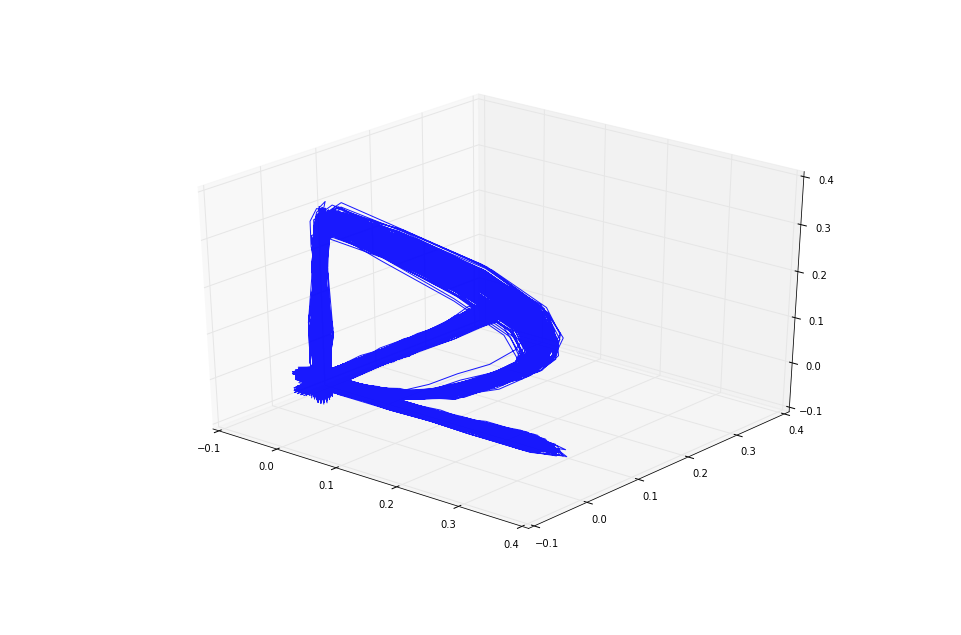

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.finance import quotes_historical_yahoo_ohlc
from random import randint
import matplotlib.cm as cmx
import matplotlib.colors as colors
%matplotlib notebook

#date1 = (2013, 2, 1)
#date2 = (2015, 7, 12)
#quotes = quotes_historical_yahoo_ohlc('YHOO', date1, date2)
#opening = [ q[1] for q in quotes[0:]]
 
def takens(time_serie, tau=1):
    q=np.array(time_serie)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    step=tau
    #jet = cm = plt.get_cmap('PRGn') 
    #cNorm  = colors.Normalize(vmin=0, vmax=len(a))
    #scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    
    xs=q
    ys=np.roll(q, step)
    zs=np.roll(q, 2*step)
    ax.plot(xs, ys, zs=zs, alpha=.9)
    #max_in_data = max(d2c)
    #for i in range(0,int(len(da)),step):
    #    color = scalarMap.to_rgba(i)
        #norm = 1.0*sum(
        #    [d2a[i:i+step]**2,d2b[i:i+step]**2,d2c[i:i+step]**2]
        #)**(.5)/(
        #    3*(max_in_data**2) **.5
        #) * homothetia
        #ax.plot(q[i], q[i+step],q[i+2*step],alpha=.2,color=color )
        #ax.quiver(
        #    da[i:i+step], db[i:i+step], dc[i:i+step], 
        #    d2a[i:i+step],d2b[i:i+step],d2c[i:i+step],
        #    alpha=float(1.0*i/len(da)),
        #    length=norm,
        #    color = scalarMap.to_rgba(i)
        #)
    plt.show()
     
takens(intermedia[:50000],50)
#takens([ randint( 0,32) for i in range(2000)],6)

<IPython.core.display.Javascript object>


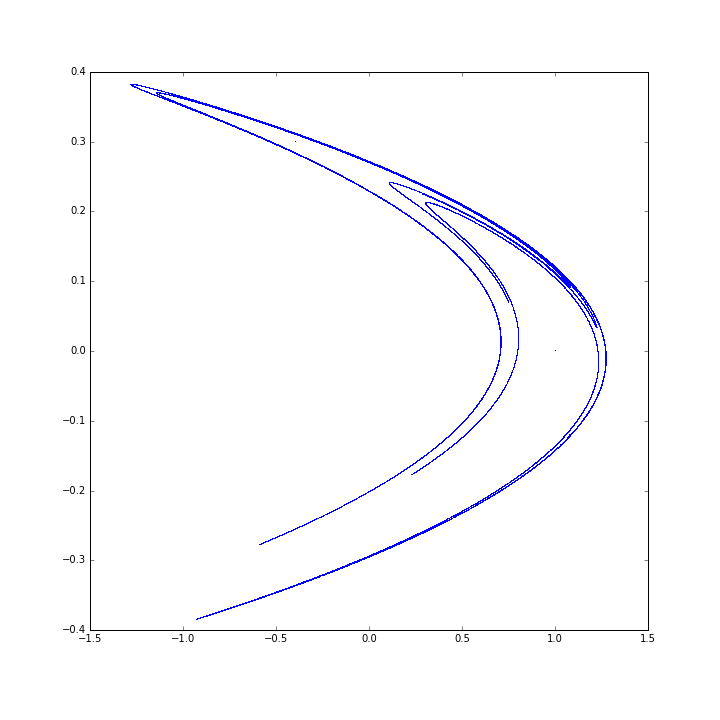

In [23]:
def fhenon(u, v):
    a, b = 1.4, 0.3
    return (v + 1 - a * u ** 2, b * u)

def henon(plot=True):
    xs=[]
    ys=[]
    u,v = 0,0
    for _ in range(100000):
        u,v = fhenon(u, v)
        xs.append(u)
        ys.append(v)
    if plot:
        plt.figure(figsize=(10,10))
        plt.plot(xs,ys, ',')
    else:
        return np.array(xs), np.array(ys)
       
henon()

<IPython.core.display.Javascript object>


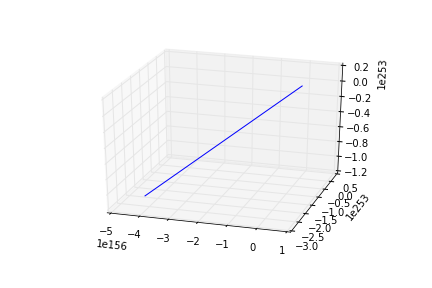

In [29]:
sigma=10
rho=8/3
beta=28

X=[(-8,8,27)]

def f(X):
    x,y,z=X
    return sigma*(y-x), x*(rho-z)-y, x*y-beta*z

for t in range(100000):
    X.append(f(X[-1]))

X=np.array(X)
x,y,z=X.T

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x,y,z)